# IA 340 Mini Project | Personal Income Growth in Iowa

IA 340 Mini Project: Markdown
- **Project Title**: Personal Income Growth in Iowa
- **Research Question**: How has personal income changed in Iowa from 1997 to 2024?
- **Source**: https://catalog.data.gov/dataset/annual-personal-income-for-state-of-iowa
- **Description**: Personal income statistics in Iowa.
- **Time Period**: 1997-2024
- **Reason for choice**: Follows my interest in economics outside of the east coast.

## Step One: Load Data Through S3 Bucket

In [29]:
#Import Librairies 
import pandas as pd
import boto3

#Read CSV from my S3 Bucket
s3_path = 's3://ia-340-fall-kline/Annual_Personal_Income_for_State_of_Iowa.csv'

#Load data into pandas
df = pd.read_csv(s3_path)

#Displays the first 5 rows
df.head()

,Row ID,Table Code,Table Name,Variable Code,Variable,Value,Variable Unit,Date
0,19000_1997_SAINC1-1_annual,SAINC1,Personal Income Summary,SAINC1-1,Personal income,69908,Millions of dollars,12/31/1997
1,19000_1998_SAINC1-1_annual,SAINC1,Personal Income Summary,SAINC1-1,Personal income,73148,Millions of dollars,12/31/1998
2,19000_1999_SAINC1-1_annual,SAINC1,Personal Income Summary,SAINC1-1,Personal income,74999,Millions of dollars,12/31/1999
3,19000_2000_SAINC1-1_annual,SAINC1,Personal Income Summary,SAINC1-1,Personal income,80083,Millions of dollars,12/31/2000
4,19000_2001_SAINC1-1_annual,SAINC1,Personal Income Summary,SAINC1-1,Personal income,82520,Millions of dollars,12/31/2001


## Step Two: Clean Data

In [7]:
#Shows dataset overview and summarizes statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7095 entries, 0 to 7094
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Row ID         7095 non-null   object
 1   Table Code     7095 non-null   object
 2   Table Name     7095 non-null   object
 3   Variable Code  7095 non-null   object
 4   Variable       7095 non-null   object
 5   Value          7095 non-null   int64 
 6   Variable Unit  7095 non-null   object
 7   Date           7095 non-null   object
dtypes: int64(1), object(7)
memory usage: 443.6+ KB


In [8]:
df.describe()

,Value
count,7.095000e+03
mean,4.764361e+06
std,1.590944e+07
min,-5.065000e+03
25%,7.179400e+04
50%,4.792240e+05
75%,2.235587e+06
max,2.013328e+08


In [9]:
#Checks for missing values
df.isnull().sum()

Row ID           0
Table Code       0
Table Name       0
Variable Code    0
Variable         0
Value            0
Variable Unit    0
Date             0
dtype: int64

In [17]:
#Counts duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [30]:
# Check the first few values to confirm format
df['Date'].head()

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Verify the conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7095 entries, 0 to 7094
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         7095 non-null   object        
 1   Table Code     7095 non-null   object        
 2   Table Name     7095 non-null   object        
 3   Variable Code  7095 non-null   object        
 4   Variable       7095 non-null   object        
 5   Value          7095 non-null   int64         
 6   Variable Unit  7095 non-null   object        
 7   Date           7095 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 443.6+ KB


In [20]:
#Compares original and cleaned data
print("Original shape:", df.shape)
print("Cleaned shape:", df.shape)

#Calculates how many rows changed
rows_removed_missing = df.shape[0] - df.dropna().shape[0]
duplicates_removed = df.duplicated().sum()

#Summarizes of cleaning actions
summary = {
    "rows_removed_missing": rows_removed_missing,
    "duplicates_removed": duplicates_removed,
    "datatype_fixes": [
        "Year → int",
        "Personal_Income → numeric",
        "Date → datetime64"
    ]
}

#Display of summary
pd.DataFrame([summary])

Original shape: (7095, 9)
Cleaned shape: (7095, 9)


,rows_removed_missing,duplicates_removed,datatype_fixes
0,7095,0,"[Year → int, Personal_Income → numeric, Date →..."


In order to clear the data, I checked for null values and missing values in which there were none. That being said, I did not have to remove any data as the dataset was already relatively clean.

## Step Three: Process/Aggregate

In [31]:
#Group by Date and compute average income value
income_summary = df.groupby('Date')['Value'].mean().reset_index()

#Rename for clarity
income_summary.rename(columns={'Value': 'Average_Income'}, inplace=True)

#Displays the result
print(income_summary.head())

        Date  Average_Income
0 1997-12-31    2.351435e+04
1 1998-12-31    2.876013e+06
2 1999-12-31    3.000470e+06
3 2000-12-31    3.179036e+06
4 2001-12-31    3.255195e+06


In [32]:
#Calculates percent change in average income
income_summary['Percent_Change'] = income_summary['Average_Income'].pct_change() * 100

print(income_summary.head())

        Date  Average_Income  Percent_Change
0 1997-12-31    2.351435e+04             NaN
1 1998-12-31    2.876013e+06    12130.884706
2 1999-12-31    3.000470e+06        4.327438
3 2000-12-31    3.179036e+06        5.951250
4 2001-12-31    3.255195e+06        2.395651


Explanation: The aggregation summarizes income trends across years, allowing for a more clear analysis of how personal income in Iowa has changed over time. The new variable 'Percent_Change' helps depict periods of expansion and recession, which supports my research question.

## Step Four: Query

In [34]:
#Filter for the year 2020
income_2020 = df[df['Date'].dt.year == 2020]

#Displays the first few rows
income_2020.head()

,Row ID,Table Code,Table Name,Variable Code,Variable,Value,Variable Unit,Date
24,19000_2020_SAINC1-1_annual,SAINC1,Personal Income Summary,SAINC1-1,Personal income,167920,Millions of dollars,2020-12-31
51,19000_2020_SAINC1-3_annual,SAINC1,Personal Income Summary,SAINC1-3,Per capita personal income,52625,Dollars,2020-12-31
78,19000_2020_SAINC4-10_annual,SAINC4-10,SAINC4-10,SAINC4-10,Personal income,167920,Millions of dollars,2020-12-31
105,19000_2020_SAINC4-11_annual,SAINC4-11,SAINC4-11,SAINC4-11,Nonfarm personal income,165485,Millions of dollars,2020-12-31
132,19000_2020_SAINC4-12_annual,SAINC4-12,SAINC4-12,SAINC4-12,Farm income,2435,Millions of dollars,2020-12-31


In [35]:
#Filter for values above 50,000
high_income = df[df['Value'] > 50000]

#Displays results
high_income.head()

,Row ID,Table Code,Table Name,Variable Code,Variable,Value,Variable Unit,Date
0,19000_1997_SAINC1-1_annual,SAINC1,Personal Income Summary,SAINC1-1,Personal income,69908,Millions of dollars,1997-12-31
1,19000_1998_SAINC1-1_annual,SAINC1,Personal Income Summary,SAINC1-1,Personal income,73148,Millions of dollars,1998-12-31
2,19000_1999_SAINC1-1_annual,SAINC1,Personal Income Summary,SAINC1-1,Personal income,74999,Millions of dollars,1999-12-31
3,19000_2000_SAINC1-1_annual,SAINC1,Personal Income Summary,SAINC1-1,Personal income,80083,Millions of dollars,2000-12-31
4,19000_2001_SAINC1-1_annual,SAINC1,Personal Income Summary,SAINC1-1,Personal income,82520,Millions of dollars,2001-12-31


Explanation: This query allows for selective analysis of personal income in Iowa. By filtering for a specific year, in this case 2020, I can closey look at Iowa’s income data during a specifec period, such as prior to or post an crucial economic event. Alternatively, applying a threshold, incomes above $50,000, tranistions the focus to high income groups, which supports the research question about income distribution/trends in the state of Iowa.

## Step Five: Visualizations

In [36]:
df.head()

,Row ID,Table Code,Table Name,Variable Code,Variable,Value,Variable Unit,Date
0,19000_1997_SAINC1-1_annual,SAINC1,Personal Income Summary,SAINC1-1,Personal income,69908,Millions of dollars,1997-12-31
1,19000_1998_SAINC1-1_annual,SAINC1,Personal Income Summary,SAINC1-1,Personal income,73148,Millions of dollars,1998-12-31
2,19000_1999_SAINC1-1_annual,SAINC1,Personal Income Summary,SAINC1-1,Personal income,74999,Millions of dollars,1999-12-31
3,19000_2000_SAINC1-1_annual,SAINC1,Personal Income Summary,SAINC1-1,Personal income,80083,Millions of dollars,2000-12-31
4,19000_2001_SAINC1-1_annual,SAINC1,Personal Income Summary,SAINC1-1,Personal income,82520,Millions of dollars,2001-12-31


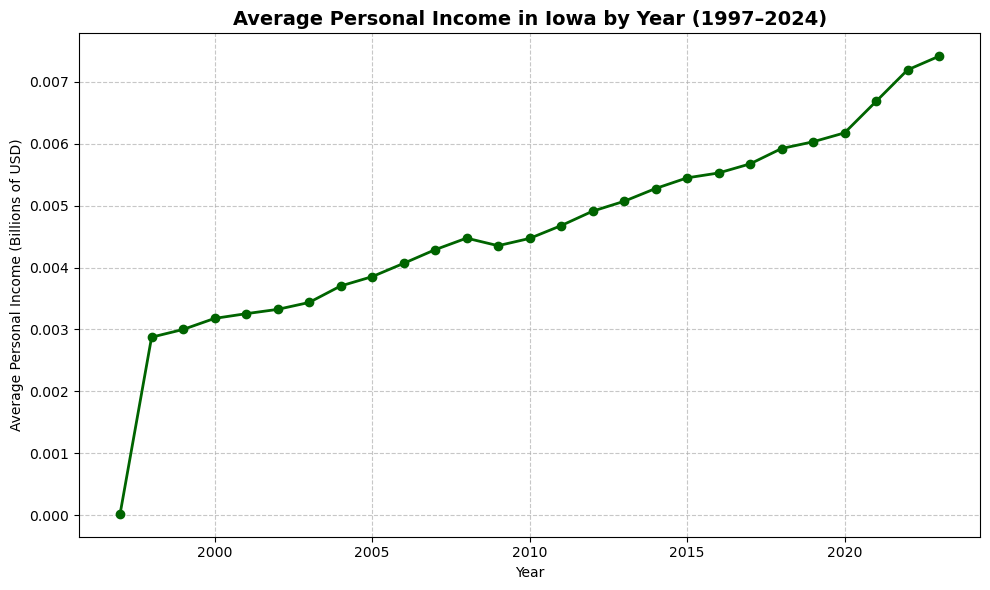

In [38]:
df["Year"] = df["Date"].dt.year

# Group by year and compute the average income
avg_income = df.groupby("Year")["Value"].mean().reset_index()

# Sort by Year (just in case)
avg_income = avg_income.sort_values("Year")

# Plot the average personal income per year
plt.figure(figsize=(10,6))
plt.plot(avg_income["Year"], avg_income["Value"]/1e9, marker='o', color='darkgreen', linewidth=2)
plt.title("Average Personal Income in Iowa by Year (1997–2024)", fontsize=14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Average Personal Income (Billions of USD)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The line chart above presents how Iowa’s total personal income has changed from 1997 to 2024.  
The steady upward slope reflects long-term economic growth, with occasional dips during  
economic downturns (such as the 2008–2009 recession or early 2020s disruptions).  
Overall, the trend suggests consistent increases in personal income across the period.

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df is already loaded
df['Year'] = pd.to_datetime(df['Date']).dt.year
df = df.sort_values('Year')

# Calculate Year-over-Year growth (%)
df['YoY_Growth_%'] = df['Value'].pct_change() * 100


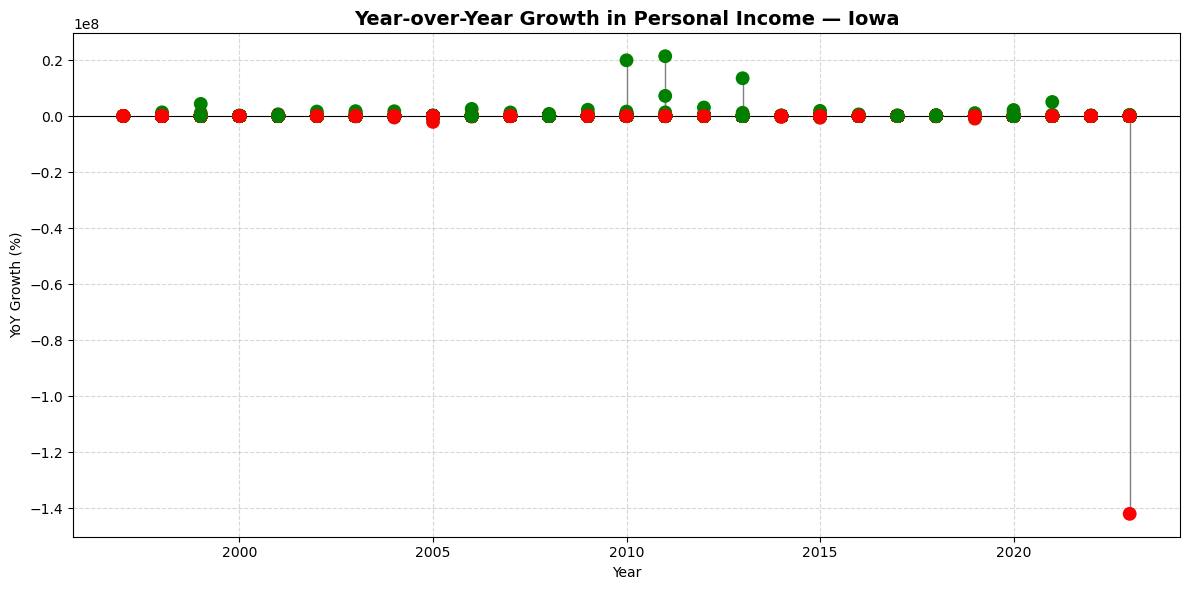

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Compute Year and Growth
df['Year'] = pd.to_datetime(df['Date']).dt.year
df = df.sort_values('Year')
df['YoY_Growth_%'] = df['Value'].pct_change() * 100

# Drop NaN values
df_clean = df.dropna(subset=['YoY_Growth_%'])

# Create the lollipop chart (Matplotlib 3.8+ compatible)
plt.figure(figsize=(12,6))

# Draw the stems manually (no deprecated args)
for i, row in df_clean.iterrows():
    plt.plot([row['Year'], row['Year']], [0, row['YoY_Growth_%']], color='gray', linewidth=1)

# Draw the circular markers
colors = ['green' if val >= 0 else 'red' for val in df_clean['YoY_Growth_%']]
plt.scatter(df_clean['Year'], df_clean['YoY_Growth_%'], color=colors, s=80, zorder=3)

# Add chart labels and styling
plt.title('Year-over-Year Growth in Personal Income — Iowa', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('YoY Growth (%)')
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


This lollipop chart shows Iowa’s year-over-year personal income growth. The vertical stems exemplify the magnitude of change, and color-coded dots highlight whether growth was positive (labeled in green) or negative (labeled in red). This chart effectively presents economic fluctuations without t